In [16]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

cosmo = Class()
cosmo.set({'output':'mPk','lensing':'no','P_k_max_1/Mpc':3.0})
cosmo.compute()

#LCDM Model

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)

In [17]:
#DM Subbed for Baryons
#omega_b_new = omega_b+omega_cdm*0.99
#omega_cdm_new = omega_cdm*0.01

cosmo.set({'omega_cdm':0.1201075*0.01,
           'omega_b':0.02238280+0.1201075*0.99,
           'YHe': 0.25,
          })
cosmo.compute()


kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk2 = [] # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk2.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)

In [22]:
#Baryons subbed for DM
#omega_cdm_new = omega_b+omega_cdm
#omega_b=0

cosmo.set({'omega_b':0.02238280*0.05,
           'omega_cdm':0.02238280*0.95+0.1201075,
           'YHe': 0.25,
           'output':'mPk',
           'lensing':'no',
          })

cosmo.compute()

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk3 = [] # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk3.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)

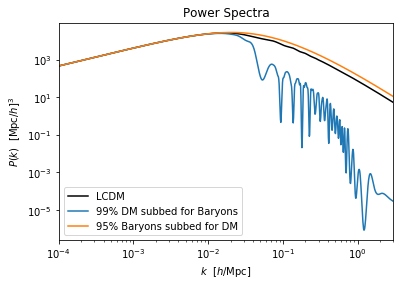

In [24]:
# plot P(k)

plt.xscale('log');
plt.yscale('log');
plt.xlim(kk[0],kk[-1])
plt.title('Power Spectra')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk1,'b-',color='k',label='LCDM')
plt.plot(kk,Pk2,label='99% DM subbed for Baryons')
plt.plot(kk,Pk3,label='95% Baryons subbed for DM')
plt.legend(loc='lower left')
plt.show()